
# LINEAR REGRESSION - TO PREDICT TRACK POPULARITY
## Includes Stepwise and cross validation

## Steps:
#### 1. Initializing and data audit
#### 2. Select relevant variables: stepwise
#### 3. Data exploration
#### 4. First data splitting
#### 5. SKLEARN execution
    A. Train/Test splitting
    B. Stepwise execution
    C. Plot selected variables
    D. Create predictions
    E. Model evaluation: charts and error measures in train and test datasets
    F. Store predictions and errors in dataset
    F. Use the model on the reserved dataset 
#### 5. STATSMODEL


## Import libraries


In [53]:
import pandas as pd, numpy as np             # Data manipulation 
from matplotlib import pyplot as plt         # Graphing
import seaborn as sns                        # Graphing

import statsmodels.api as sm                    # Statistical analysis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats                      # Stats

#sns.set(style="white")                       # Tuning the style of charts
import warnings                              # Disable some warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


from IPython.core.display import display, Markdown


## Data exploration


In [54]:
file_name = "segmented_songs_2025.csv"
df = pd.read_csv(file_name)
df.drop(columns= 'Unnamed: 0', inplace = True)
df.head()

,year,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,house,hip hop,electronic,reggae,jazz,trap,techno,blues,country pop,audio_cluster
0,2000,73,62,0.66,0.81,4.0,87.0,0.0,0.05,2.30e-01,...,0,0,0,0,0,0,0,0,0,0
1,2000,69,49,0.48,0.94,7.0,71.0,1.0,0.07,8.91e-04,...,0,0,0,0,0,0,0,0,0,0
2,2000,61,76,0.54,0.50,1.0,80.0,1.0,0.03,4.90e-01,...,0,0,0,0,0,0,0,0,0,1
3,2000,84,75,0.43,0.90,0.0,69.0,1.0,0.05,1.03e-02,...,0,0,0,0,0,0,0,0,0,1
4,2000,72,57,0.56,0.54,1.0,92.0,1.0,0.03,2.60e-01,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df.groupby('audio_cluster')[['audio_cluster']].count()

,audio_cluster
audio_cluster,
0,900
1,1140
2,259


Some statistics and verify missing values

In [56]:
df.select_dtypes(include='number').columns

Index(['year', 'track_popularity', 'artist_popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'artist_popularity_binary', 'Other', 'rock', 'pop', 'metal', 'country',
       'house', 'hip hop', 'electronic', 'reggae', 'jazz', 'trap', 'techno',
       'blues', 'country pop', 'audio_cluster'],
      dtype='object')

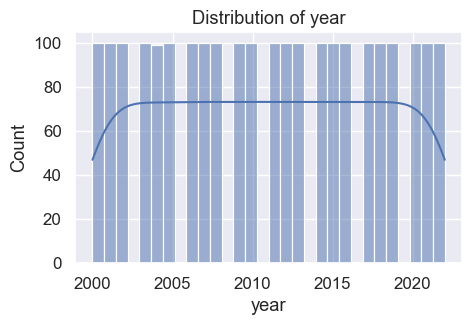

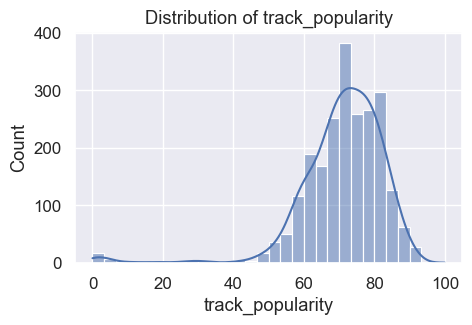

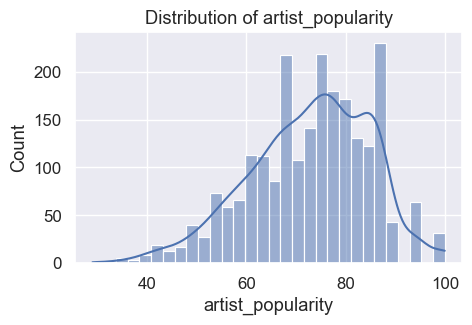

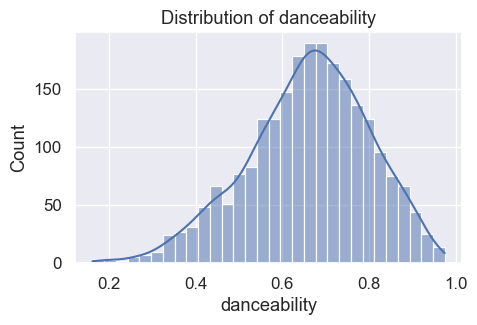

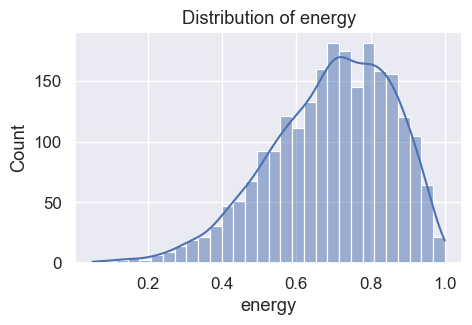

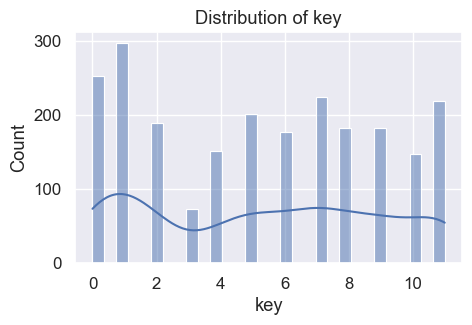

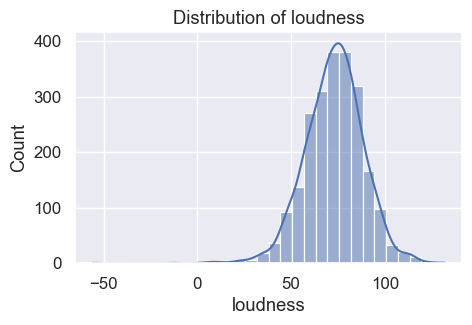

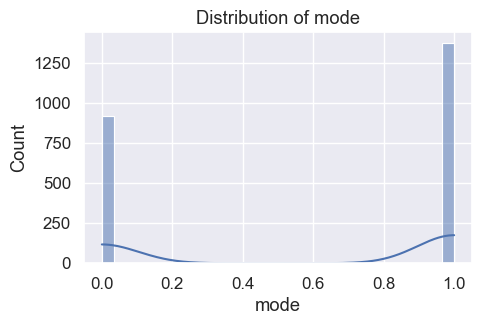

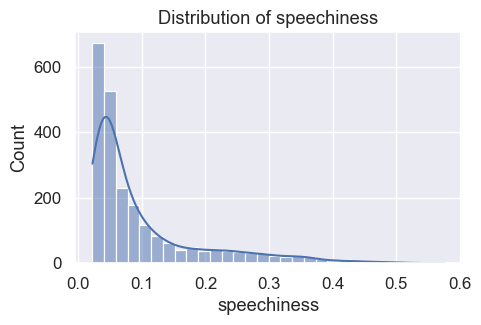

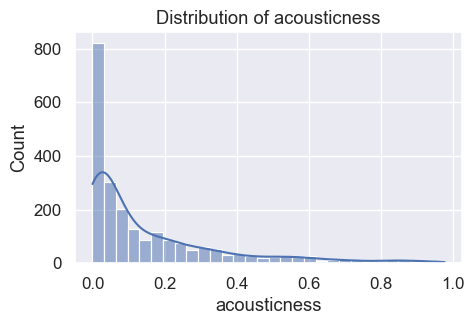

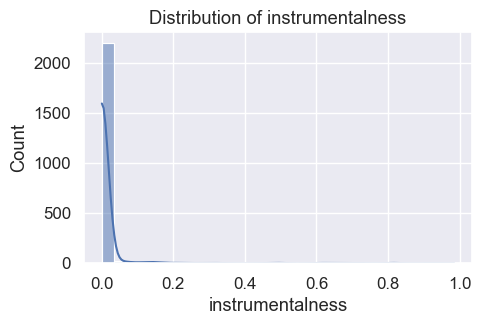

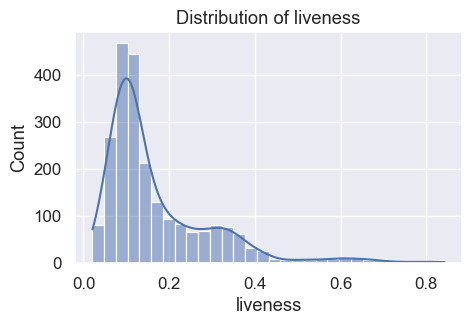

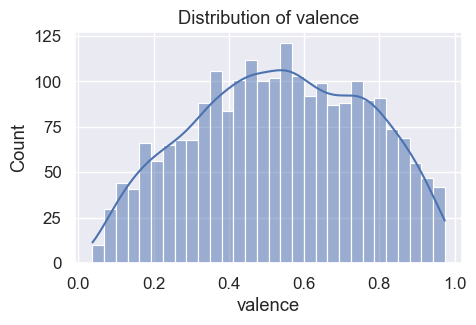

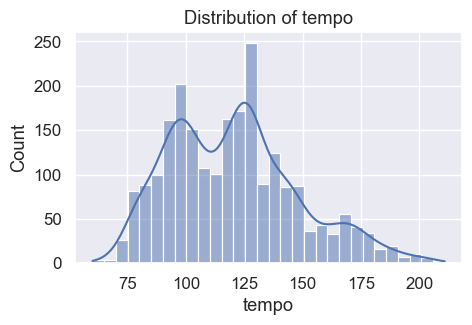

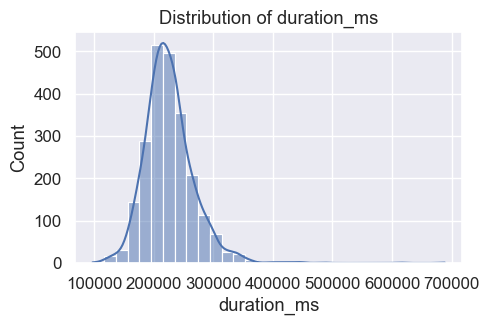

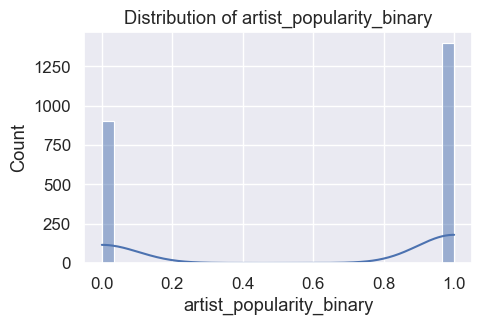

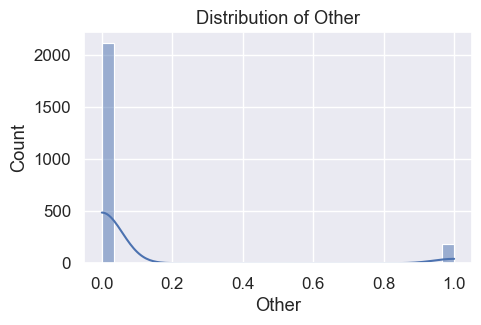

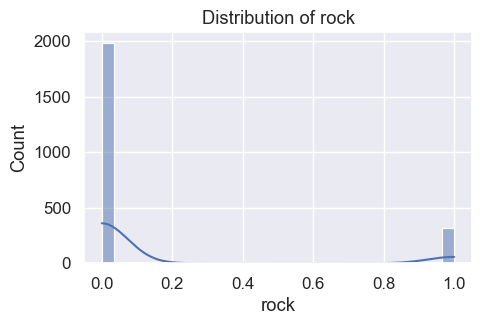

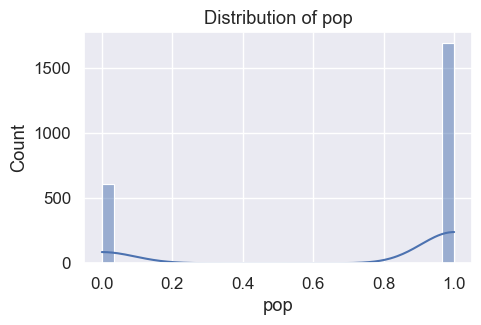

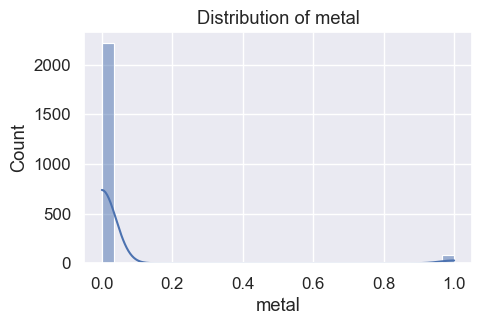

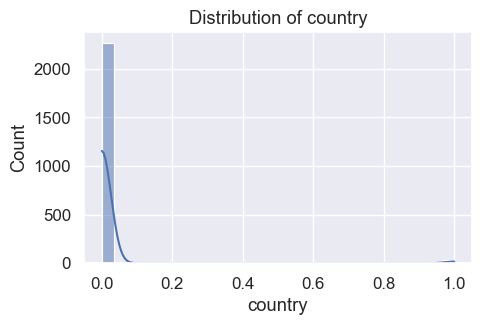

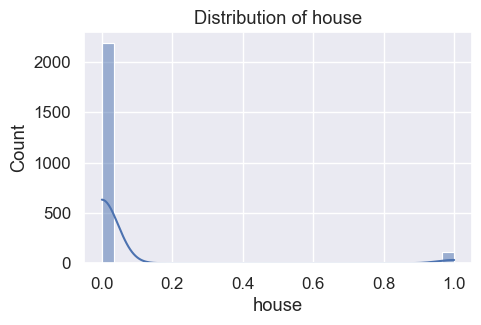

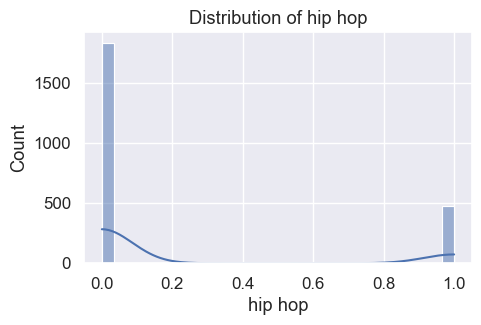

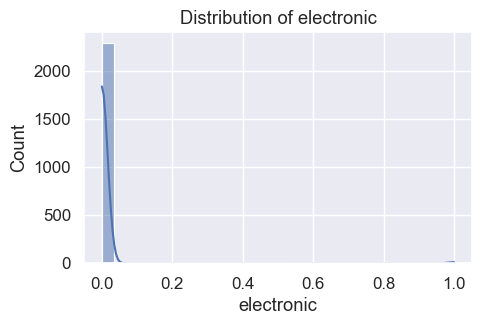

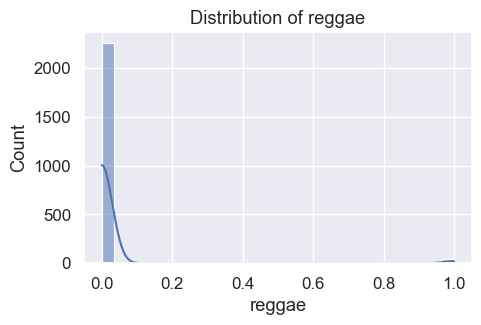

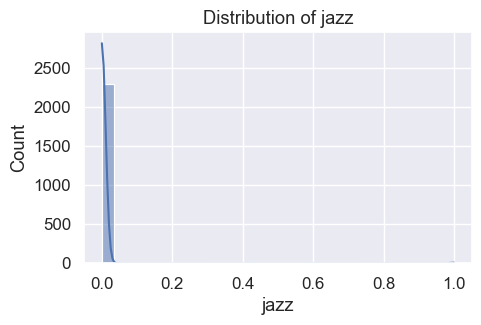

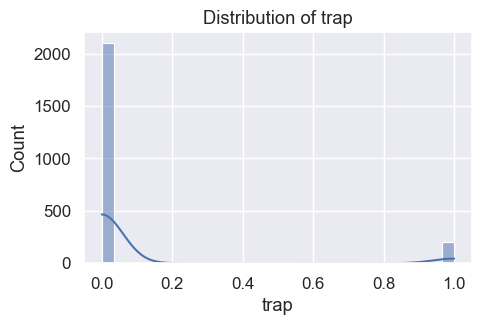

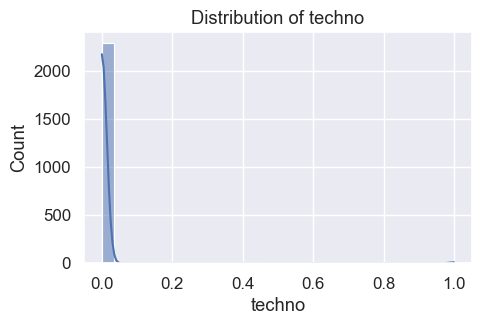

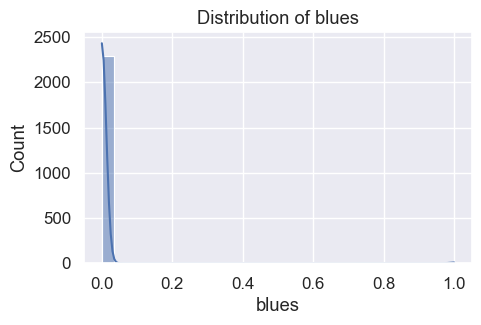

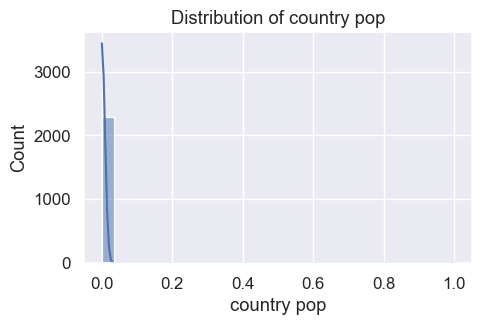

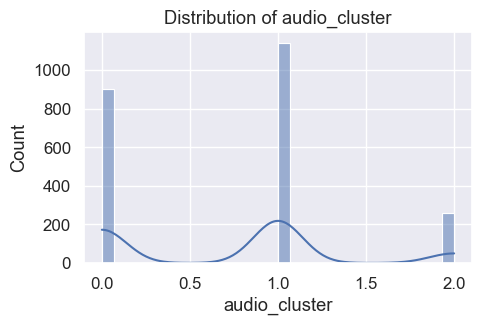

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution of each feature
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()



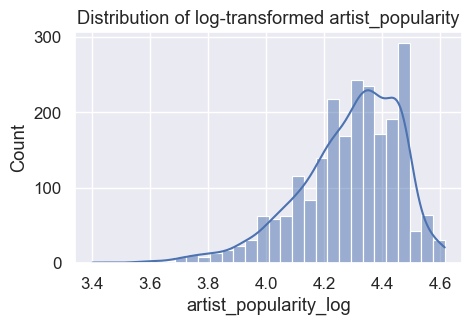

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply Log Transformation
df['artist_popularity_log'] = np.log1p(df['artist_popularity'])  # log1p handles log(0) safely

# Visualize the transformed distribution
plt.figure(figsize=(5, 3))
sns.histplot(df['artist_popularity_log'], bins=30, kde=True)
plt.title('Distribution of log-transformed artist_popularity')
plt.show()


In [59]:
pd.set_option("display.precision", 2)
df.describe()

,year,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,hip hop,electronic,reggae,jazz,trap,techno,blues,country pop,audio_cluster,artist_popularity_log
count,2299.00,2299.00,2299.00,2299.00,2299.00,2299.00,2299.00,2299.00,2299.00,2.30e+03,...,2299.00,2.30e+03,2299.00,2.30e+03,2299.00,2.30e+03,2.30e+03,2.30e+03,2299.00,2299.00
mean,2011.00,70.94,72.87,0.66,0.69,5.28,73.01,0.60,0.10,1.58e-01,...,0.21,6.09e-03,0.02,2.61e-03,0.09,4.35e-03,3.48e-03,1.74e-03,0.72,4.29
std,6.63,12.29,12.18,0.14,0.16,3.63,15.64,0.49,0.09,2.04e-01,...,0.40,7.78e-02,0.14,5.10e-02,0.28,6.58e-02,5.89e-02,4.17e-02,0.65,0.18
min,2000.00,0.00,29.00,0.16,0.05,0.00,-56.00,0.00,0.02,1.29e-05,...,0.00,0.00e+00,0.00,0.00e+00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00,3.40
25%,2005.00,66.00,65.00,0.57,0.59,2.00,63.00,0.00,0.04,1.65e-02,...,0.00,0.00e+00,0.00,0.00e+00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00,4.19
50%,2011.00,72.00,74.00,0.67,0.71,5.00,74.00,1.00,0.06,6.89e-02,...,0.00,0.00e+00,0.00,0.00e+00,0.00,0.00e+00,0.00e+00,0.00e+00,1.00,4.32
75%,2017.00,79.00,82.00,0.76,0.82,8.00,83.00,1.00,0.12,2.23e-01,...,0.00,0.00e+00,0.00,0.00e+00,0.00,0.00e+00,0.00e+00,0.00e+00,1.00,4.42
max,2022.00,100.00,100.00,0.97,1.00,11.00,132.00,1.00,0.58,9.78e-01,...,1.00,1.00e+00,1.00,1.00e+00,1.00,1.00e+00,1.00e+00,1.00e+00,2.00,4.62


In [60]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

year                        0
track_popularity            0
artist_popularity           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
artist_popularity_binary    0
Other                       0
rock                        0
pop                         0
metal                       0
country                     0
house                       0
hip hop                     0
electronic                  0
reggae                      0
jazz                        0
trap                        0
techno                      0
blues                       0
country pop                 0
audio_cluster               0
artist_popularity_log       0
dtype: int64

[Text(0.5, 1.0, 'Histogram of track popularity variable')]

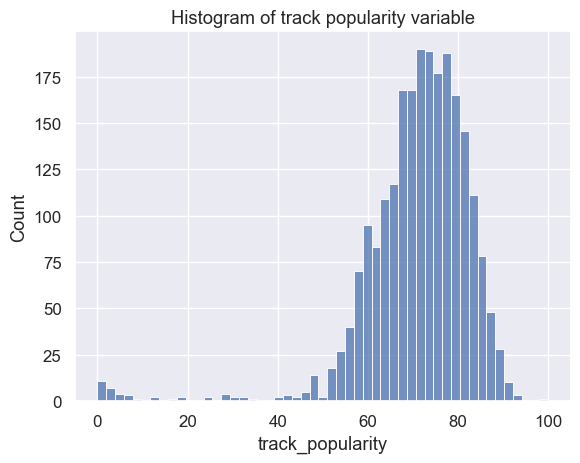

In [61]:
# Histogram of dependent variable
target = "track_popularity"
sns.histplot(df[target]).set(title='Histogram of track popularity variable')

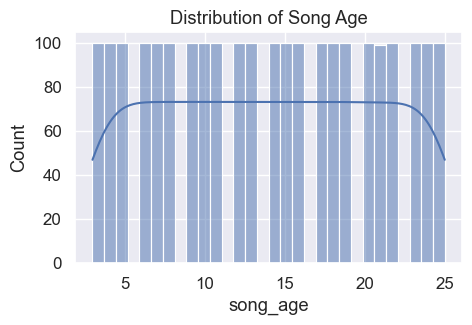

In [62]:
# Convert year to age
df['song_age'] = 2025 - df['year']  # Assuming current year is 2025

# Visualize the new feature
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.histplot(df['song_age'], bins=30, kde=True)
plt.title('Distribution of Song Age')
plt.show()


We can see that the track popularity data is skewed to the left. Thus, we have a skewed dependent variable and can run a model, but it is important to keep in mind that the residuals might be affected.

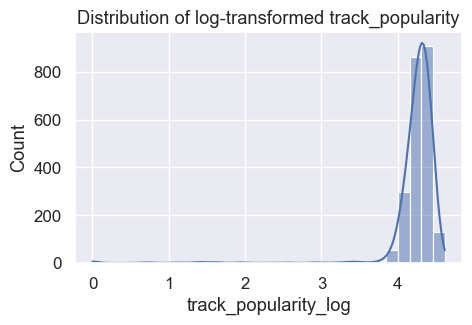

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply Log Transformation
df['track_popularity_log'] = np.log1p(df['track_popularity'])  # log1p handles log(0) safely

# Visualize the transformed distribution
plt.figure(figsize=(5, 3))
sns.histplot(df['track_popularity_log'], bins=30, kde=True)
plt.title('Distribution of log-transformed track_popularity')
plt.show()


In [64]:
df['track_popularity_log'].describe()

count    2299.00
mean        4.24
std         0.39
min         0.00
25%         4.20
50%         4.29
75%         4.38
max         4.62
Name: track_popularity_log, dtype: float64

Lower Bound: 3.9386915964665925, Upper Bound: 4.648027657598254
Original dataset size: 2299
Cleaned dataset size: 2229


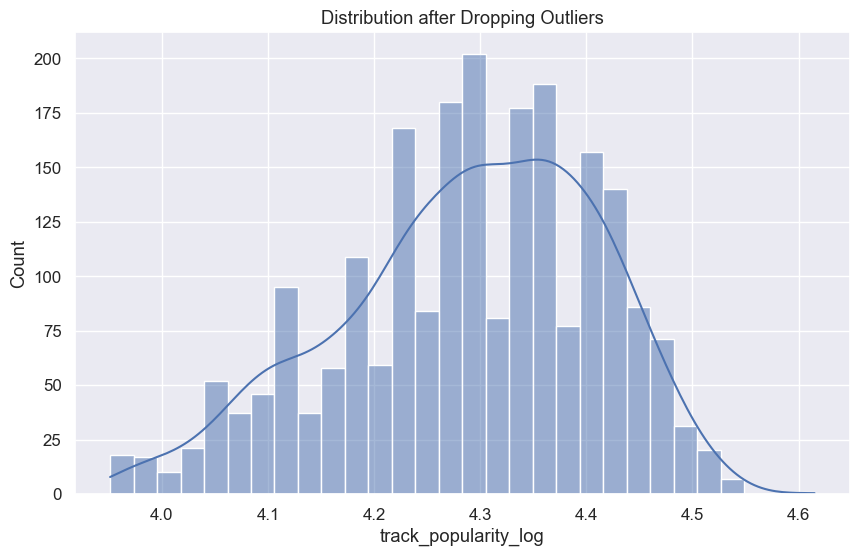

In [65]:
# Calculate the IQR
Q1 = df['track_popularity_log'].quantile(0.25)
Q3 = df['track_popularity_log'].quantile(0.75)
IQR = Q3 - Q1

# Determine the outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Drop outliers
df_cleaned = df[(df['track_popularity_log'] >= lower_bound) & (df['track_popularity_log'] <= upper_bound)]

# Check the result
print(f"Original dataset size: {df.shape[0]}")
print(f"Cleaned dataset size: {df_cleaned.shape[0]}")


# Visualize the cleaned distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['track_popularity_log'], bins=30, kde=True)
plt.title('Distribution after Dropping Outliers')
plt.show()


In [66]:
df= df_cleaned.copy()

target = "track_popularity_log"


#### Some data transformation?

In [67]:
#We created also the log version of the track popularity variable and called it ln_popularity
#df["ln_popularity"] = np.log(df.track_popularity)
#df

In [68]:
#understanding the shape of the dataframe - number of rows and columns
df.shape 

(2229, 34)

In [ ]:
# Get the column names
numerical_columns = list(df.select_dtypes(include=[np.number]).columns)
categorical_columns = list(df.select_dtypes(include=[object]).columns)
date_columns = list(df.select_dtypes(include=['<M8[ns]']).columns)

# Print a quick summary of what we just loaded
print("Loaded dataset")
print("   Rows: %s" % df.shape[0])
print("   Columns: %s (%s num, %s cat, %s date)" % (df.shape[1], 
                                                    len(numerical_columns), len(categorical_columns),
                                                    len(date_columns)))

Loaded dataset
   Rows: 2229
   Columns: 34 (34 num, 0 cat, 0 date)


In [70]:
# Histogram of dependent variable
#target = "ln_popularity"
#sns.histplot(df[target]).set(title='Histogram of ln_popularity variable')

We will use the log of track_popularity to increase/enforce the "normalization" of the target variable

In [71]:
df.columns

Index(['year', 'track_popularity', 'artist_popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'artist_popularity_binary', 'Other', 'rock', 'pop', 'metal', 'country',
       'house', 'hip hop', 'electronic', 'reggae', 'jazz', 'trap', 'techno',
       'blues', 'country pop', 'audio_cluster', 'artist_popularity_log',
       'song_age', 'track_popularity_log'],
      dtype='object')

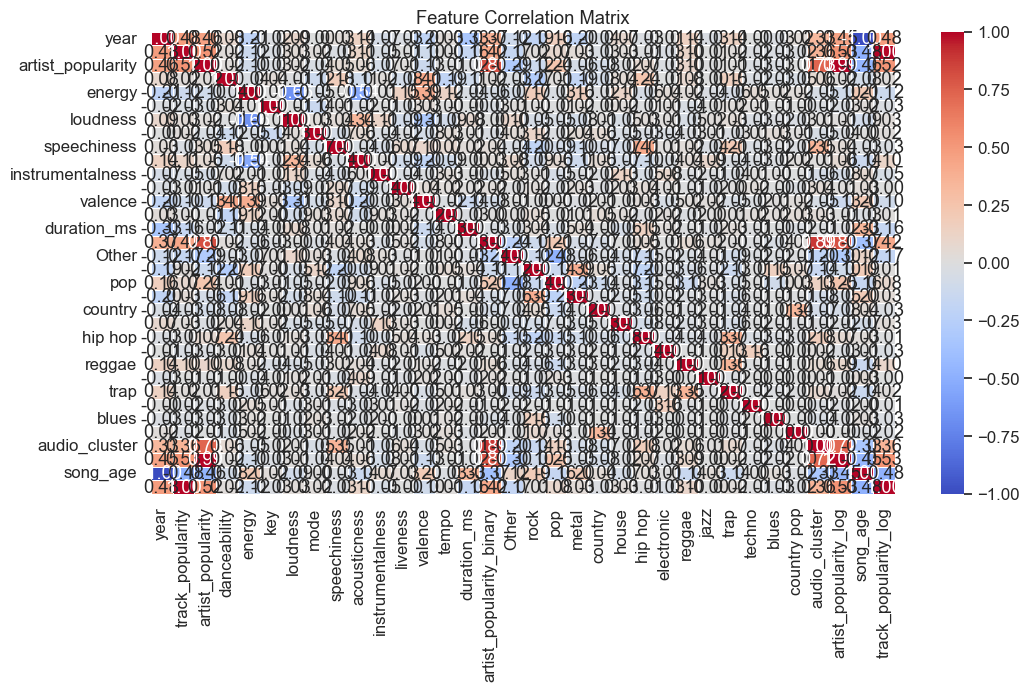

In [72]:
columns_to_plot = [
    'year', 'track_popularity', 'artist_popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'artist_popularity_binary', 'Other', 'rock', 'pop', 'metal', 'country',
       'house', 'hip hop', 'electronic', 'reggae', 'jazz', 'trap', 'techno',
       'blues', 'country pop', 'audio_cluster', 'artist_popularity_log',
       'song_age', 'track_popularity_log'
]

corr_matrix = df[columns_to_plot].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

In [73]:
# Find highly correlated pairs
correlation_threshold = 0.66
high_corr_pairs = []

for col in corr_matrix.columns:
    for index in corr_matrix.index:
        if col != index and abs(corr_matrix.loc[col, index]) > correlation_threshold:
            high_corr_pairs.append((col, index))

# Print highly correlated features
print(f"Highly Correlated Features {correlation_threshold}:", high_corr_pairs)

Highly Correlated Features 0.66: [('year', 'song_age'), ('track_popularity', 'track_popularity_log'), ('artist_popularity', 'artist_popularity_binary'), ('artist_popularity', 'audio_cluster'), ('artist_popularity', 'artist_popularity_log'), ('artist_popularity_binary', 'artist_popularity'), ('artist_popularity_binary', 'audio_cluster'), ('artist_popularity_binary', 'artist_popularity_log'), ('audio_cluster', 'artist_popularity'), ('audio_cluster', 'artist_popularity_binary'), ('audio_cluster', 'artist_popularity_log'), ('artist_popularity_log', 'artist_popularity'), ('artist_popularity_log', 'artist_popularity_binary'), ('artist_popularity_log', 'audio_cluster'), ('song_age', 'year'), ('track_popularity_log', 'track_popularity')]


We will drop year, track_popularity, artist_popularity as they have been transformed 

In [74]:
#dropping the selected columns
columns_to_drop= ['year', 'track_popularity', 'artist_popularity']
print("Dropping the following columns: %s" % columns_to_drop)
df = df.drop(columns_to_drop, axis=1)

Dropping the following columns: ['year', 'track_popularity', 'artist_popularity']


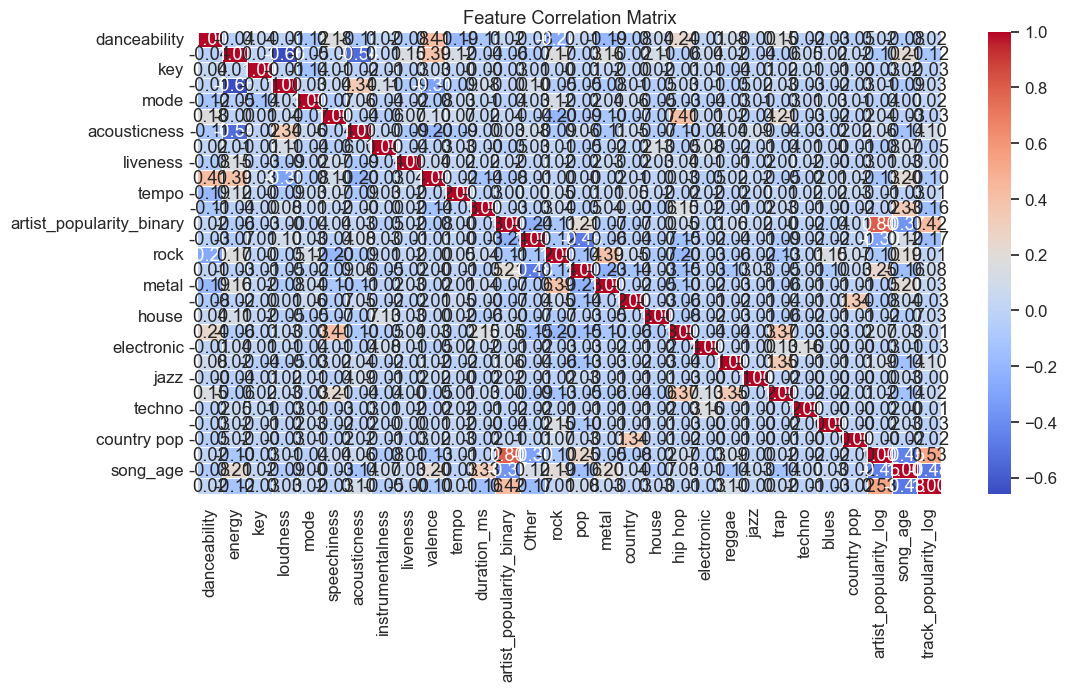

In [75]:
columns_to_plot = [
     'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'artist_popularity_binary', 'Other', 'rock', 'pop', 'metal', 'country',
       'house', 'hip hop', 'electronic', 'reggae', 'jazz', 'trap', 'techno',
       'blues', 'country pop', 'artist_popularity_log',
       'song_age', 'track_popularity_log'
]

corr_matrix = df[columns_to_plot].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

In [76]:
# Find highly correlated pairs
correlation_threshold = 0.5
high_corr_pairs = []

for col in corr_matrix.columns:
    for index in corr_matrix.index:
        if col != index and abs(corr_matrix.loc[col, index]) > correlation_threshold:
            high_corr_pairs.append((col, index))

# Print highly correlated features
print(f"Highly Correlated Features {correlation_threshold}:", high_corr_pairs)

Highly Correlated Features 0.5: [('energy', 'loudness'), ('energy', 'acousticness'), ('loudness', 'energy'), ('acousticness', 'energy'), ('artist_popularity_binary', 'artist_popularity_log'), ('artist_popularity_log', 'artist_popularity_binary'), ('artist_popularity_log', 'track_popularity_log'), ('track_popularity_log', 'artist_popularity_log')]


Now we need to drop all the correlated variables above 0.5:
- hip hop (keep) vs trap 
- valence (keep) vs danceability 
- pop (keep) vs Other
- acousticness (keep) vs energy 

In [77]:
# Find highly correlated pairs
correlation_threshold = 0.4
high_corr_pairs = []

for col in corr_matrix.columns:
    for index in corr_matrix.index:
        if col != index and abs(corr_matrix.loc[col, index]) > correlation_threshold:
            high_corr_pairs.append((col, index))

# Print highly correlated features
print(f"Highly Correlated Features {correlation_threshold}:", high_corr_pairs)

Highly Correlated Features 0.4: [('danceability', 'valence'), ('energy', 'loudness'), ('energy', 'acousticness'), ('loudness', 'energy'), ('speechiness', 'hip hop'), ('acousticness', 'energy'), ('valence', 'danceability'), ('artist_popularity_binary', 'artist_popularity_log'), ('artist_popularity_binary', 'track_popularity_log'), ('Other', 'pop'), ('pop', 'Other'), ('hip hop', 'speechiness'), ('artist_popularity_log', 'artist_popularity_binary'), ('artist_popularity_log', 'song_age'), ('artist_popularity_log', 'track_popularity_log'), ('song_age', 'artist_popularity_log'), ('song_age', 'track_popularity_log'), ('track_popularity_log', 'artist_popularity_binary'), ('track_popularity_log', 'artist_popularity_log'), ('track_popularity_log', 'song_age')]


In [78]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'artist_popularity_binary', 'Other', 'rock', 'pop',
       'metal', 'country', 'house', 'hip hop', 'electronic', 'reggae', 'jazz',
       'trap', 'techno', 'blues', 'country pop', 'audio_cluster',
       'artist_popularity_log', 'song_age', 'track_popularity_log'],
      dtype='object')

In [79]:
#dropping the selected columns
columns_to_drop= [ 'trap', 'Other', 'danceability',
       'energy', 'artist_popularity_binary']
print("Dropping the following columns: %s" % columns_to_drop)
df = df.drop(columns_to_drop, axis=1)

Dropping the following columns: ['trap', 'Other', 'danceability', 'energy', 'artist_popularity_binary']


### Rescaling all variables

In [80]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Step 1: Fit and Transform using StandardScaler
#ss = StandardScaler()
ss = MinMaxScaler()

X_std = ss.fit_transform(df)

# Step 2: Convert the NumPy array back to a DataFrame
# - Use the original column names
# - Preserve the original index
df = pd.DataFrame(X_std, columns=df.columns, index=df.index)

df

,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,...,electronic,reggae,jazz,techno,blues,country pop,audio_cluster,artist_popularity_log,song_age,track_popularity_log
0,0.36,0.76,0.0,0.05,2.35e-01,0.00e+00,0.09,0.91,0.15,0.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.55,1.0,0.53
1,0.64,0.68,1.0,0.08,8.91e-04,0.00e+00,0.09,0.66,0.24,0.16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.34,1.0,0.45
2,0.09,0.72,1.0,0.01,5.01e-01,0.00e+00,0.10,0.19,0.38,0.18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.74,1.0,0.26
3,0.00,0.66,1.0,0.05,1.05e-02,0.00e+00,0.72,0.69,0.59,0.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.73,1.0,0.74
4,0.09,0.79,1.0,0.02,2.66e-01,0.00e+00,0.13,0.22,0.53,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.48,1.0,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294,0.00,0.79,0.0,0.11,3.65e-01,0.00e+00,0.11,0.85,0.97,0.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.46,0.0,0.61
2295,0.45,0.70,1.0,0.03,2.53e-02,0.00e+00,0.68,0.58,0.58,0.13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.80,0.0,0.63
2296,0.55,0.78,0.0,0.15,5.27e-01,4.17e-04,0.18,0.24,0.40,0.09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.74,0.0,0.79
2297,0.45,0.63,0.0,0.11,9.08e-02,2.98e-03,0.12,0.90,0.32,0.13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.86,0.0,0.79


### We decided to reserve 10% of our data to implement predictions and simulate it is additional data as we did in class


In [81]:
# model = 90%
# reserved = 10%

df_model, df_reserved = train_test_split(df, test_size=0.1, random_state=42)
print ("Sample size dataset reserved for prediction: ", df_reserved.shape[0], "records")

# Sets y
y = df_model[target]

Sample size dataset reserved for prediction:  223 records


# Linear Regression Model with SKLEARN

## Train Test Split from our songs dataset - 80% train and 20% test


In [82]:
# cross validation (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(df_model, y, test_size=0.2)
print ("Sample size train dataset: ", X_train.shape)
print ("Sample size test dataset: ", X_test.shape)

Sample size train dataset:  (1604, 26)
Sample size test dataset:  (402, 26)


### Function to define stepwise execution

In [83]:
# Stepwise function
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.1, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(X[included+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.4}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(X[included])).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.4}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [84]:
# Removes some variables: target, irrelevent and those with missing values (stepwise does not work with them)
# we will call X_train2 to this dataframe

irrelevant_columns = [target]
X_train2=X_train.drop(columns=irrelevant_columns)

for field in X_train2:
    if X_train2[field].isnull().any():
        X_train2=X_train2.drop(labels=[field], axis=1)
        
X_train2

,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,...,hip hop,electronic,reggae,jazz,techno,blues,country pop,audio_cluster,artist_popularity_log,song_age
259,0.27,0.71,0.0,3.67e-02,2.94e-02,5.18e-02,0.04,0.47,0.43,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.68,0.91
2057,0.45,0.67,1.0,4.52e-02,6.26e-01,0.00e+00,0.25,0.44,0.42,0.14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.78,0.09
341,0.73,0.64,0.0,1.46e-02,2.68e-03,8.00e-04,0.36,0.78,0.44,0.22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.61,0.86
1137,0.45,0.73,1.0,3.41e-02,3.86e-03,3.86e-06,0.38,0.80,0.46,0.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.77,0.50
1316,0.73,0.59,1.0,8.94e-02,4.07e-02,0.00e+00,0.07,0.15,0.45,0.29,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0.71,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,0.82,0.55,1.0,9.61e-02,2.22e-01,0.00e+00,0.07,0.27,0.12,0.31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.69,0.59
1161,0.45,0.74,1.0,7.77e-03,5.20e-02,8.88e-05,0.08,0.19,0.53,0.31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.86,0.50
456,0.09,0.57,0.0,1.09e-01,5.08e-01,2.08e-06,0.12,0.86,0.40,0.34,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.57,0.82
1003,0.09,0.81,0.0,1.03e-01,1.02e-01,2.06e-03,0.05,0.72,0.40,0.18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.65,0.55


In [85]:
X_train2.dtypes

key                      float64
loudness                 float64
mode                     float64
speechiness              float64
acousticness             float64
instrumentalness         float64
liveness                 float64
valence                  float64
tempo                    float64
duration_ms              float64
rock                     float64
pop                      float64
metal                    float64
country                  float64
house                    float64
hip hop                  float64
electronic               float64
reggae                   float64
jazz                     float64
techno                   float64
blues                    float64
country pop              float64
audio_cluster            float64
artist_popularity_log    float64
song_age                 float64
dtype: object

In [86]:
result = stepwise_selection(X_train2, y_train)
print('resulting features:')
print(result)

Add  artist_popularity_log          with p-value 7.261e-120
Add  song_age                       with p-value 8.691e-46
Add  metal                          with p-value 1.427e-08
Add  rock                           with p-value 0.0004016
Add  acousticness                   with p-value 0.003103
Add  blues                          with p-value 0.007153
Add  duration_ms                    with p-value 0.00957
resulting features:
['artist_popularity_log', 'song_age', 'metal', 'rock', 'acousticness', 'blues', 'duration_ms']


### Create a dataframe with chosen explanatory variables

In [87]:
X_train_stepwise=X_train2
for item in X_train2.columns:
    if item not in result:
        X_train_stepwise=X_train_stepwise.drop(labels=[item],axis=1) #removes the non relevant variables

And we run scatterplots and correlation of explanatory variables since stepwise does not detect it

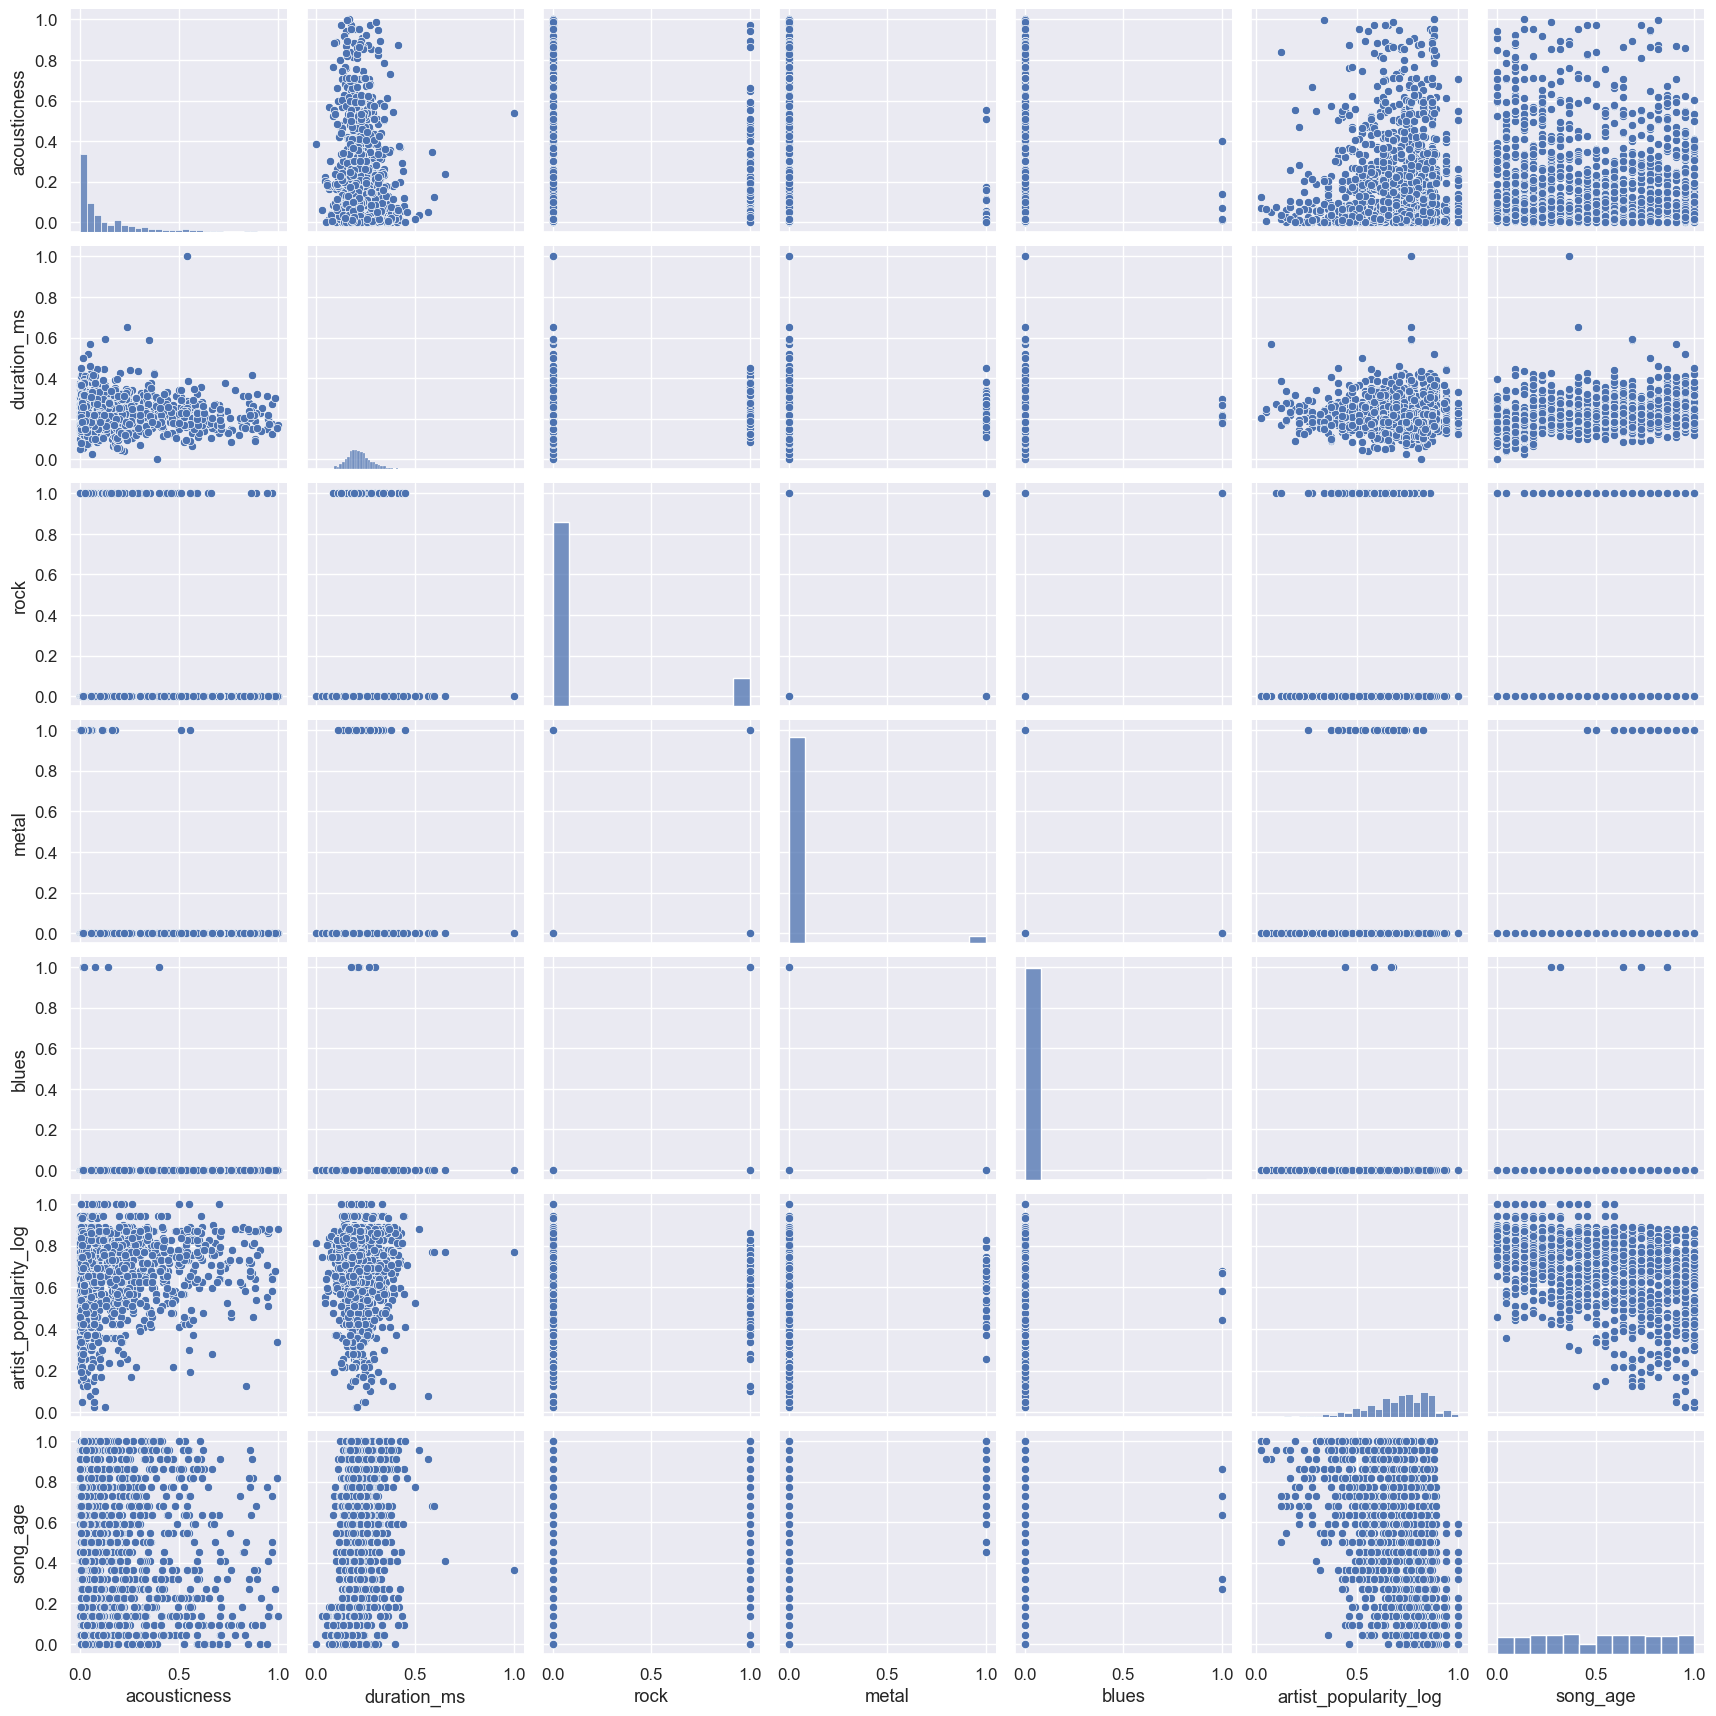

In [88]:
sns.pairplot(X_train_stepwise)

<Axes: >

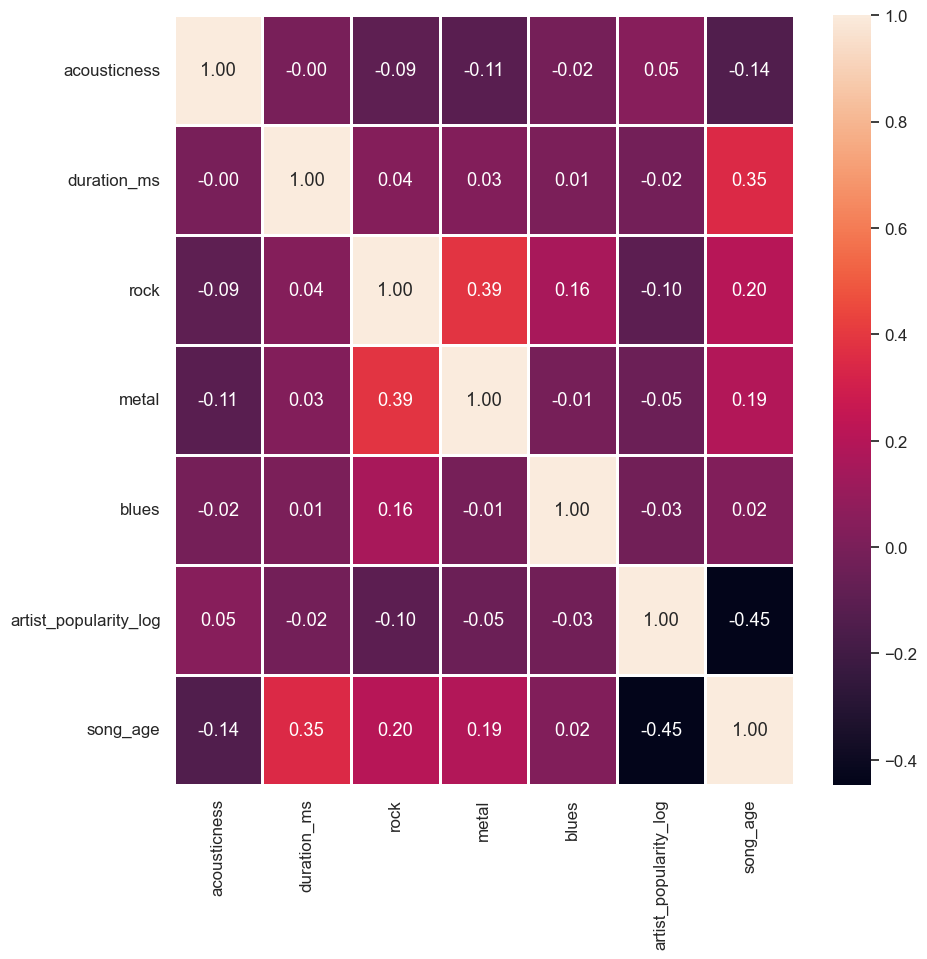

In [89]:
# and heatmap to show correlation between explanatory variables
sns.set(font_scale=1.1)
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(X_train_stepwise.corr(), annot=True, fmt=".2f", linewidths=1, ax=ax)

## Creating and Training the Model

In [90]:
lm = LinearRegression(fit_intercept=True)
model=lm.fit(X_train_stepwise, y_train)

## Model Evaluation


In [91]:
# print R squared train dataset
print(f"R squared value is : {model.score(X_train_stepwise,y_train):.3f}")

R squared value is : 0.397


In [92]:
# print coefficients (but not confidence intervals: sklearn does not store them)
coeff_df = pd.DataFrame(model.coef_,X_train_stepwise.columns,columns=['Coefficient'])
print("Intercept: ", lm.intercept_)
coeff_df

Intercept:  0.31817540669802685


,Coefficient
acousticness,0.05
duration_ms,-0.14
rock,0.05
metal,0.09
blues,-0.16
artist_popularity_log,0.44
song_age,-0.21


### Create predictions 

If we accept the model, then we  create predictions on both the train and the test dataset to compare them

First some charts comparing fitted and real values

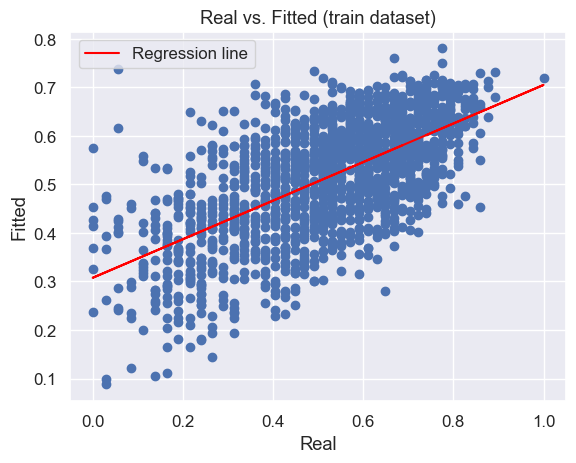

In [93]:
predictions_train = lm.predict(X_train[X_train_stepwise.columns]) #only with the columns used in the model

plt.title("Real vs. Fitted (train dataset)")
plt.scatter(y_train,predictions_train)

coef = np.polyfit(y_train, predictions_train, 1)  
poly1d_fn = np.poly1d(coef)  
plt.plot(y, poly1d_fn(y), color="red", label="Regression line")

plt.xlabel("Real")
plt.ylabel("Fitted")
plt.legend()
plt.show()

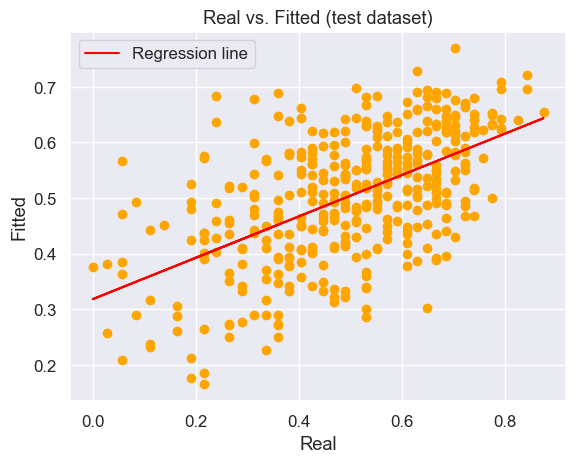

In [94]:
# test dataset
predictions_test = lm.predict(X_test[X_train_stepwise.columns]) #only with the columns used in the model
plt.title("Real vs. Fitted (test dataset)")
plt.scatter(y_test,predictions_test, color="orange")

coef = np.polyfit(y_test, predictions_test, 1)  
poly1d_fn = np.poly1d(coef)  
plt.plot(y_test, poly1d_fn(y_test), color="red", label="Regression line")

plt.xlabel("Real")
plt.ylabel("Fitted")

plt.legend()
plt.show()

## Residual Histograms

And residual histograms to check hypothesis of normality in residuals

[Text(0.5, 1.0, 'Histogram of dependent - train dataset')]

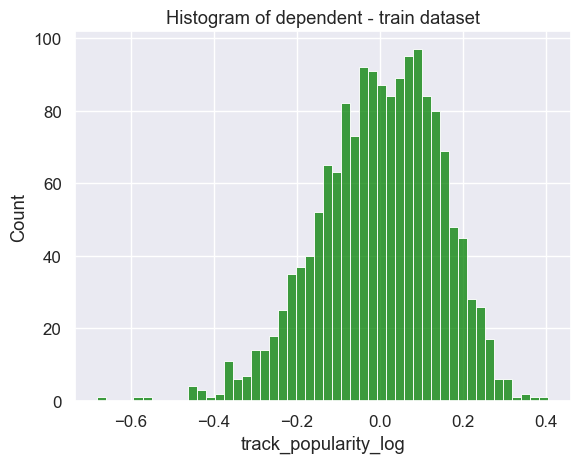

In [95]:
# training dataset
sns.histplot((y_train-predictions_train),bins=50, color="green").set(title='Histogram of dependent - train dataset')

[Text(0.5, 1.0, 'Histogram of dependent - test dataset')]

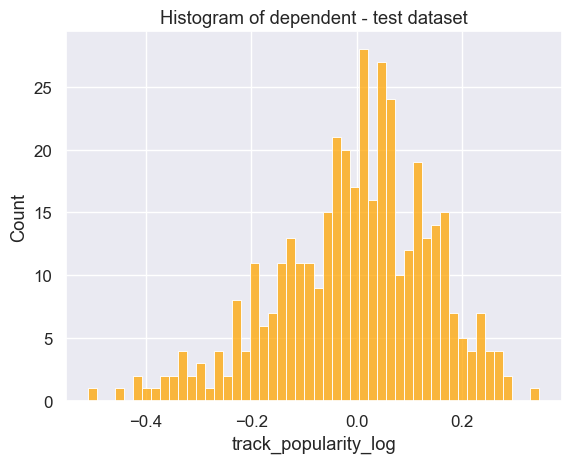

In [96]:
# test dataset
sns.histplot((y_test-predictions_test),bins=50, color="orange").set(title='Histogram of dependent - test dataset')

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Mean Absolute Percentage Error** (MAPE) is the mean of the absolute percent error:

$${\frac 1n\sum_{i=1}^n}{|y_i-\hat{y}_i)|\over y_i}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.
- **MAPE** is the best metric, because allows comparison between different models.

All of these are **loss functions**, because we want to minimize them.


In [97]:
from sklearn import metrics

# error comparison between the two datasets
print ("Errors:\n")
results = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'MAPE %'],
    'Train': [
        metrics.mean_absolute_error(y_train, predictions_train),
        metrics.mean_squared_error(y_train, predictions_train),
        np.sqrt(metrics.mean_squared_error(y_train, predictions_train)),
        np.mean(100 * abs(y_train - predictions_train) / y_train)
    ],
    'Test': [
        metrics.mean_absolute_error(y_test, predictions_test),
        metrics.mean_squared_error(y_test, predictions_test),
        np.sqrt(metrics.mean_squared_error(y_test, predictions_test)),
        np.mean(100 * abs(y_test - predictions_test) / y_test)
    ]
}

results_df = pd.DataFrame(results)
results_df

Errors:



,Metric,Train,Test
0,MAE,0.12,0.11
1,MSE,0.02,0.02
2,RMSE,0.14,0.15
3,MAPE %,inf,inf


#### Store predictions and errors in the dataset

In [98]:
def store_predictions (df):
    df = df.copy()
    # first move target variable to the end to show it along with predictions and errors
    df = df[[col for col in df.columns if col !=target] + [target]]
    
    predictions = lm.predict(df[X_train_stepwise.columns])
    df.loc[:, target + "_predicted"] = predictions
    
    df.loc[:, "error"] = df[target] - df[target + "_predicted"]
    df.loc[:, "%abs error"] = abs(100*df["error"]) /  df[target]
    return df

In [99]:
X_train = store_predictions(X_train)
X_train

,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,...,techno,blues,country pop,audio_cluster,artist_popularity_log,song_age,track_popularity_log,track_popularity_log_predicted,error,%abs error
259,0.27,0.71,0.0,3.67e-02,2.94e-02,5.18e-02,0.04,0.47,0.43,0.24,...,0.0,0.0,0.0,0.5,0.68,0.91,0.06,0.40,-3.44e-01,604.74
2057,0.45,0.67,1.0,4.52e-02,6.26e-01,0.00e+00,0.25,0.44,0.42,0.14,...,0.0,0.0,0.0,0.5,0.78,0.09,0.65,0.66,-9.70e-03,1.50
341,0.73,0.64,0.0,1.46e-02,2.68e-03,8.00e-04,0.36,0.78,0.44,0.22,...,0.0,0.0,0.0,0.0,0.61,0.86,0.31,0.43,-1.16e-01,37.18
1137,0.45,0.73,1.0,3.41e-02,3.86e-03,3.86e-06,0.38,0.80,0.46,0.19,...,0.0,0.0,0.0,0.5,0.77,0.50,0.45,0.53,-8.10e-02,18.09
1316,0.73,0.59,1.0,8.94e-02,4.07e-02,0.00e+00,0.07,0.15,0.45,0.29,...,1.0,0.0,0.0,0.5,0.71,0.41,0.61,0.51,1.04e-01,16.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,0.82,0.55,1.0,9.61e-02,2.22e-01,0.00e+00,0.07,0.27,0.12,0.31,...,0.0,0.0,0.0,0.5,0.69,0.59,0.19,0.47,-2.81e-01,147.85
1161,0.45,0.74,1.0,7.77e-03,5.20e-02,8.88e-05,0.08,0.19,0.53,0.31,...,0.0,0.0,0.0,0.5,0.86,0.50,0.78,0.56,2.20e-01,28.40
456,0.09,0.57,0.0,1.09e-01,5.08e-01,2.08e-06,0.12,0.86,0.40,0.34,...,0.0,0.0,0.0,0.0,0.57,0.82,0.57,0.38,1.91e-01,33.34
1003,0.09,0.81,0.0,1.03e-01,1.02e-01,2.06e-03,0.05,0.72,0.40,0.18,...,0.0,0.0,0.0,0.0,0.65,0.55,0.67,0.48,1.92e-01,28.83


In [100]:
X_test = store_predictions(X_test)
X_test

,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,...,techno,blues,country pop,audio_cluster,artist_popularity_log,song_age,track_popularity_log,track_popularity_log_predicted,error,%abs error
700,0.64,0.69,1.0,0.05,1.46e-02,2.61e-01,0.03,0.97,0.45,0.40,...,0.0,0.0,0.0,0.5,0.84,0.68,0.19,0.49,-0.30,159.01
865,1.00,0.67,1.0,0.35,9.22e-02,0.00e+00,0.08,0.79,0.36,0.19,...,0.0,0.0,0.0,1.0,0.77,0.64,0.38,0.51,-0.12,32.29
1932,0.36,0.70,1.0,0.02,4.45e-01,0.00e+00,0.18,0.48,0.29,0.15,...,0.0,0.0,0.0,0.5,0.78,0.14,0.53,0.64,-0.11,20.08
2162,0.64,0.61,1.0,0.02,7.92e-03,7.09e-05,0.13,0.43,0.46,0.32,...,0.0,0.0,0.0,0.5,0.80,0.05,0.74,0.62,0.12,16.35
1988,0.00,0.79,1.0,0.19,5.27e-02,0.00e+00,0.05,0.33,0.50,0.17,...,0.0,0.0,0.0,0.5,0.81,0.14,0.53,0.63,-0.10,18.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,0.55,0.76,0.0,0.46,2.46e-02,1.83e-06,0.12,0.31,0.27,0.18,...,0.0,0.0,0.0,0.0,0.60,0.73,0.34,0.41,-0.07,21.95
676,0.36,0.67,0.0,0.09,7.35e-04,1.91e-03,0.04,0.56,0.27,0.17,...,0.0,0.0,0.0,0.5,0.78,0.73,0.24,0.49,-0.25,103.94
2193,0.64,0.81,1.0,0.27,8.52e-01,1.82e-03,0.15,0.52,0.14,0.20,...,0.0,0.0,0.0,1.0,1.00,0.05,0.70,0.77,-0.06,9.18
1882,0.73,0.62,0.0,0.37,1.61e-01,4.89e-06,0.05,0.62,0.24,0.19,...,0.0,0.0,0.0,1.0,0.74,0.18,0.61,0.59,0.02,3.21


### Finally, we apply our model to the reserved dataset and calculate metrics

In [101]:
df_reserved = store_predictions(df_reserved)
df_reserved

,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,...,techno,blues,country pop,audio_cluster,artist_popularity_log,song_age,track_popularity_log,track_popularity_log_predicted,error,%abs error
56,0.00,0.80,1.0,1.39e-02,1.02e-01,1.26e-04,0.38,0.88,0.39,0.23,...,0.0,0.0,0.0,0.0,0.51,1.00,0.26,0.31,-4.56e-02,17.20
502,0.18,0.57,1.0,3.29e-02,2.85e-01,7.04e-01,0.05,0.80,0.52,0.12,...,0.0,0.0,0.0,0.0,0.46,0.77,0.51,0.36,1.49e-01,29.26
1699,0.18,0.73,1.0,2.05e-01,5.39e-02,0.00e+00,0.21,0.41,0.66,0.19,...,0.0,0.0,0.0,0.5,1.00,0.23,0.76,0.69,6.73e-02,8.88
219,0.00,0.68,0.0,1.22e-01,6.34e-02,3.30e-03,0.08,0.48,0.42,0.30,...,0.0,0.0,0.0,0.5,0.78,0.91,0.11,0.44,-3.26e-01,291.71
968,0.82,0.84,1.0,8.00e-02,2.58e-01,2.10e-06,0.08,0.17,0.37,0.36,...,0.0,0.0,0.0,0.0,0.46,0.59,0.31,0.36,-5.02e-02,16.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.82,0.64,1.0,8.85e-03,2.03e-01,6.57e-05,0.14,0.11,0.29,0.29,...,0.0,0.0,0.0,0.0,0.61,0.73,0.72,0.46,2.65e-01,36.65
1205,0.91,0.73,1.0,5.69e-02,1.75e-03,0.00e+00,0.27,0.32,0.53,0.38,...,0.0,0.0,0.0,0.0,0.63,0.45,0.36,0.50,-1.37e-01,38.12
234,0.18,0.73,0.0,1.16e-02,2.46e-01,3.80e-06,0.13,0.70,0.20,0.28,...,0.0,0.0,0.0,0.0,0.65,0.91,0.36,0.39,-3.56e-02,9.90
1091,0.55,0.63,0.0,3.45e-02,7.27e-04,1.47e-05,0.07,0.79,0.52,0.16,...,0.0,0.0,0.0,0.0,0.63,0.55,0.59,0.51,8.26e-02,13.97


In [102]:
# calculates error, %error and MAPE into the dataframe
print ("Errors in reserved dataset:\n")

print(f"MAE:, {abs(df_reserved["error"]).mean():.2f}")

#print(f"R squared value is : {model.score(X_train_stepwise,y_train):.3f}")
MSE = np.square(df_reserved["error"]).mean()

print(f"MSE: {MSE:.2f}") 
print(f"RMSE: {np.sqrt(MSE):.2f}") 
print (f"MAPE %: {df_reserved["%abs error"].mean():.2f}") 

Errors in reserved dataset:

MAE:, 0.12
MSE: 0.02
RMSE: 0.15
MAPE %: 38.64


## ADITIONAL INFO USING STATSMODELS LIBRARY
#### It does not include automatic cross validation like sklearn but allows to obtain confidence intervals

In [103]:
# model with an additional library (statmodels)
X_train_stepwise = sm.add_constant(X_train_stepwise) 

In [104]:
result = sm.OLS(y_train, X_train_stepwise).fit()
print (result.summary())

                             OLS Regression Results                             
Dep. Variable:     track_popularity_log   R-squared:                       0.397
Model:                              OLS   Adj. R-squared:                  0.395
Method:                   Least Squares   F-statistic:                     150.4
Date:                  Fri, 21 Feb 2025   Prob (F-statistic):          1.50e-170
Time:                          00:56:48   Log-Likelihood:                 826.05
No. Observations:                  1604   AIC:                            -1636.
Df Residuals:                      1596   BIC:                            -1593.
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const     